In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Configuration import import_parallelparameter, allocate_parallelparameter, write_parallelparameter
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars,reset
from lowEBMs.Packages.Functions import plotmeanstd
from lowEBMs import update_plotstyle
import matplotlib
update_plotstyle()
matplotlib.rcParams['lines.linewidth']=1.1
time_sec_year=60*60*24*365
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

In [ ]:
configCTRLVolc1D=importer('Dev_Data/Volcanic_CTRL.ini')
variable_importer(configCTRLVolc1D,False)#,accuracy_number=2000,accuracy=1e-4)
configCTRLVolc1D,ParasCTRL=add_sellersparameters(configCTRLVolc1D,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
CTRLVolc1D=rk4alg(model_equation,configCTRLVolc1D['eqparam'],configCTRLVolc1D['funccomp'])
CTRLVolc1D_ZMT=np.mean(CTRLVolc1D[1][-36*10:],axis=0)
CTRLVolc1D_GMT=np.mean(CTRLVolc1D[2][-36*10:],axis=0)

configVolc_EVA=importer('Dev_Data/Volcanic_EVA_Optimization.ini')
variable_importer(configVolc_EVA,False)#,accuracy_number=2000,accuracy=1e-4)
configVolc_EVA,ParasVolc_EVA=add_sellersparameters(configVolc_EVA,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
#Elevation_weight=np.average(0.0065*np.array(ParasCTRL[1][1]),weights=np.cos(Vars.Lat*2*np.pi/360))
Vars.T,Vars.T_global=CTRLVolc1D_ZMT,CTRLVolc1D_GMT
Volc_EVA=rk4alg(model_equation,configVolc_EVA['eqparam'],configVolc_EVA['funccomp'])

In [ ]:
plt.plot(CTRLVolc1D[0],CTRLVolc1D[2])

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
C=np.zeros(len(Vars.Read['P']))
print(Vars.Read['P'])
for i in range(len(Vars.Read['P'])):
    C[i]=np.average(Vars.Read['P'][i],weights=np.cos(Vars.Lat2*np.pi/180))
#plt.ylim(-0.9,0.2)
#ax[0].xlim(1980,2010)
#plt.plot(Volc_EVA[0]/time_sec_year,Volc_EVA[2])#-CTRLVolc1D_GMT)
ax[0].plot(Volc_EVA[0]/time_sec_year,moving_average(Volc_EVA[2],36))#-CTRLVolc1D_GMT,36))
#C=print(np.shape(np.array(Vars.Read['C'])))
ax[1].plot(Volc_EVA[0][1:]/time_sec_year,moving_average(C,365))

In [3]:
from lowEBMs.Packages.Configuration import import_parallelparameter, allocate_parallelparameter, write_parallelparameter
#from lowEBMs.Packages.Variables import variable_importer_parallelized, builtin_importer_parallelized

In [4]:
configCTRLVolc1D=importer('Dev_Data/Volcanic_CTRL.ini')
raw=import_parallelparameter('Dev_Data/EnsembleConfig.ini')
allocated,setup=allocate_parallelparameter(raw)
variable_importer(configCTRLVolc1D,parallel=True,parallel_config=setup)
#variable_importer_parallelized(configCTRLVolc1D,setup,False)#,accuracy_number=2000,accuracy=1e-4)
configCTRLVolc1D,ParasCTRL=add_sellersparameters(configCTRLVolc1D,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
configCTRLVolc1D=write_parallelparameter(configCTRLVolc1D,allocated,setup)
#print(configCTRLVolc1D)
#print(np.shape(Vars.T))
#print(configCTRLVolc1D['funccomp']['funcparam']['func2'])
CTRLVolc1D=rk4alg(model_equation,configCTRLVolc1D['eqparam'],configCTRLVolc1D['funccomp'])
CTRLVolc1D_ZMT=np.mean(CTRLVolc1D[1][-36*10:],axis=0)
CTRLVolc1D_GMT=np.mean(CTRLVolc1D[2][-36*10:],axis=0)

Loading Configuration from: Dev_Data/Volcanic_CTRL.ini
Loading fit-configuration from: Dev_Data/EnsembleConfig.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 90.03133058547974 seconds


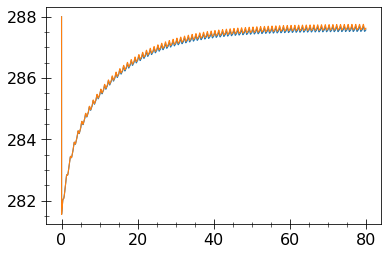

In [5]:
plt.plot(CTRLVolc1D[0]/time_sec_year,CTRLVolc1D[2])
#print(CTRLVolc1D[2][-1,0],CTRLVolc1D[2][-1,1])

In [98]:
configFuncDiffCTRL=importer('Dev_Data/Volc_Rout/Volcanic_CTRL_DifferentRout.ini')

setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configFuncDiffCTRL,parallel=True,parallel_config=setup)

configFuncDiffCTRL,ParasCTRL=add_sellersparameters(configFuncDiffCTRL,parameterinterpolatorstepwise,'SellersParameterization.ini',5,0,True,True)

Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
for i in range(1,5):
    configFuncDiffCTRL['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]
#print(configFuncDiff)
FuncDiffCTRL=rk4alg(model_equation,configFuncDiffCTRL['eqparam'],configFuncDiffCTRL['funccomp'])
#FuncDiff_ZMT=np.mean(CTRLVolc1D[1][-36*10:],axis=0)
#FuncDiff_GMT=np.mean(CTRLVolc1D[2][-36*10:],axis=0)

Loading Configuration from: Dev_Data/Volc_Rout/Volcanic_CTRL_DifferentRout.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Simulation finished within 86.62501072883606 seconds


In [99]:
ControlTemperatures_ZMT=np.reshape(np.zeros(4*18),(4,18))
ControlTemperatures_GMT=np.zeros(4)
for i in range(4):
    ControlTemperatures_ZMT[i]=np.mean(FuncDiffCTRL[1][-int(10*365/5):,i],axis=0)
    ControlTemperatures_GMT[i]=np.average(ControlTemperatures_ZMT[i],weights=np.cos(Vars.Lat*np.pi/180))

In [100]:
configFuncDiff=importer('Dev_Data/Volc_Rout/DifferentRout_Pinatubo.ini')

setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configFuncDiff,parallel=True,parallel_config=setup)

configFuncDiff,ParasCTRL=add_sellersparameters(configFuncDiff,parameterinterpolatorstepwise,'SellersParameterization.ini',5,0,True,True)

Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
for i in range(1,5):
    configFuncDiff['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]

Vars.T,Vars.T_global=ControlTemperatures_ZMT,ControlTemperatures_GMT
FuncDiff=rk4alg(model_equation,configFuncDiff['eqparam'],configFuncDiff['funccomp'])

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Pinatubo.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Simulation finished within 131.23556232452393 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


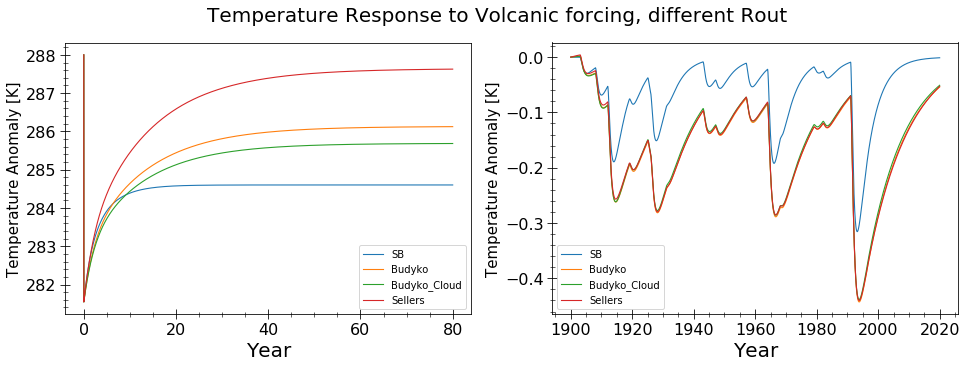

In [101]:
labels=['SB','Budyko','Budyko_Cloud','Sellers']
fig,ax=plt.subplots(1,2,figsize=(16,5))
fig.suptitle('Temperature Response to Volcanic forcing, different Rout',fontsize=20)
for i in range(4):
    ax[0].plot(FuncDiffCTRL[0]/time_sec_year,FuncDiffCTRL[2][:,i],label=labels[i])
ax[0].legend()
for i in range(4):
    ax[1].plot(FuncDiff[0]/time_sec_year,FuncDiff[2][:,i]-ControlTemperatures_GMT[i],label=labels[i])
ax[1].legend()

ax[0].set_xlabel('Year'),ax[1].set_xlabel('Year')
ax[0].set_ylabel('Temperature Anomaly [K]',fontsize=15),ax[1].set_ylabel('Temperature Anomaly [K]',fontsize=15)
plt.savefig('ResponseDifference_Rout.eps',format='eps',dpi=400,bbox_inches='tight')

In [7]:
configCTRLPlanck=importer('Dev_Data/Volc_Rout/DifferentRout_Planck_CTRL.ini')

#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configCTRLPlanck)

configCTRLPlanck,ParasCTRL=add_sellersparameters(configCTRLPlanck,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
PlanckCTRL=rk4alg(model_equation,configCTRLPlanck['eqparam'],configCTRLPlanck['funccomp'])
PlanckCTRL_ZMT=np.mean(PlanckCTRL[1][-int(10*365/5):],axis=0)
PlanckCTRL_GMT=np.average(PlanckCTRL_ZMT,weights=np.cos(Vars.Lat*np.pi/180))
Planck_Transfer=np.mean(Vars.Read['Transfer'][-int(10*365/5):],axis=0)

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Planck_CTRL.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 31.080996990203857 seconds


In [79]:
configCTRLBud=importer('Dev_Data/Volc_Rout/DifferentRout_Bud_CTRL.ini')

#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configCTRLBud)

configCTRLBud,ParasCTRL=add_sellersparameters(configCTRLBud,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
BudCTRL=rk4alg(model_equation,configCTRLBud['eqparam'],configCTRLBud['funccomp'])
BudCTRL_ZMT=np.mean(BudCTRL[1][-int(10*365/5):],axis=0)
BudCTRL_GMT=np.average(BudCTRL_ZMT,weights=np.cos(Vars.Lat*np.pi/180))
Bud_Transfer=np.mean(Vars.Read['Transfer'][-int(10*365/5):],axis=0)

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Bud_CTRL.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


KeyboardInterrupt: 

In [80]:
configCTRLBud1=importer('Dev_Data/Volc_Rout/DifferentRout_Budno_CTRL.ini')

#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configCTRLBud1)

configCTRLBud1,ParasCTRL=add_sellersparameters(configCTRLBud1,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Bud1CTRL=rk4alg(model_equation,configCTRLBud1['eqparam'],configCTRLBud1['funccomp'])
Bud1CTRL_ZMT=np.mean(Bud1CTRL[1][-int(10*365/5):],axis=0)
Bud1CTRL_GMT=np.average(Bud1CTRL_ZMT,weights=np.cos(Vars.Lat*np.pi/180))
Bud1_Transfer=np.mean(Vars.Read['Transfer'][-int(10*365/5):],axis=0)

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Budno_CTRL.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 31.182932376861572 seconds


In [73]:
configCTRLSel=importer('Dev_Data/Volc_Rout/DifferentRout_Sellers_CTRL.ini')

#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configCTRLSel)

configCTRLSel,ParasCTRL=add_sellersparameters(configCTRLSel,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
SelCTRL=rk4alg(model_equation,configCTRLSel['eqparam'],configCTRLSel['funccomp'])
SelCTRL_ZMT=np.mean(SelCTRL[1][-int(10*365/5):],axis=0)
SelCTRL_GMT=np.average(SelCTRL_ZMT,weights=np.cos(Vars.Lat*np.pi/180))
Sel_Transfer=np.mean(Vars.Read['Transfer'][-int(10*365/5):],axis=0)

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Sellers_CTRL.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 47.19664978981018 seconds


In [9]:
configPlanck=importer('Dev_Data/Volc_Rout/DifferentRout_Planck.ini')

#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configPlanck)

configPlanck,ParasCTRL=add_sellersparameters(configPlanck,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Vars.T,Vars.T_global=PlanckCTRL_ZMT,PlanckCTRL_GMT
Planck=rk4alg(model_equation,configPlanck['eqparam'],configPlanck['funccomp'])

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Planck.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 50.44916129112244 seconds


In [10]:
configBud=importer('Dev_Data/Volc_Rout/DifferentRout_Bud.ini')

#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configBud)

configBud,ParasCTRL=add_sellersparameters(configBud,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Vars.T,Vars.T_global=BudCTRL_ZMT,BudCTRL_GMT
Bud=rk4alg(model_equation,configBud['eqparam'],configBud['funccomp'])

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Bud.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 49.63083791732788 seconds


In [81]:
configBud1=importer('Dev_Data/Volc_Rout/DifferentRout_Budno.ini')

#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configBud1)

configBud1,ParasCTRL=add_sellersparameters(configBud1,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Vars.T,Vars.T_global=Bud1CTRL_ZMT,Bud1CTRL_GMT
Bud1=rk4alg(model_equation,configBud1['eqparam'],configBud1['funccomp'])

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Budno.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 47.98154878616333 seconds


In [31]:
configSel=importer('Dev_Data/Volc_Rout/DifferentRout_Sellers.ini')

#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configSel)

configPlanck,ParasCTRL=add_sellersparameters(configSel,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Vars.T,Vars.T_global=SelCTRL_ZMT,SelCTRL_GMT
Sel=rk4alg(model_equation,configSel['eqparam'],configSel['funccomp'])

Loading Configuration from: Dev_Data/Volc_Rout/DifferentRout_Sellers.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 51.08136796951294 seconds


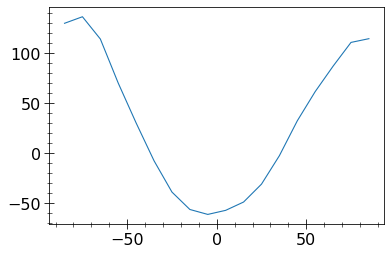

In [62]:
plt.plot(Vars.Lat,Sel_Transfer)

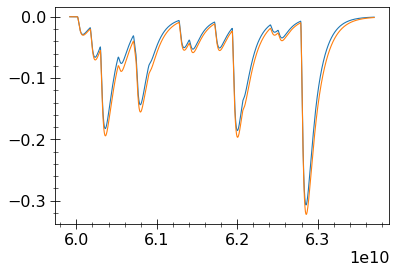

In [84]:
plt.plot(Planck[0],Planck[2]-PlanckCTRL_GMT)
#plt.plot(Bud[0],Bud[2]-BudCTRL_GMT)
plt.plot(Bud1[0],Bud1[2]-Bud1CTRL_GMT)
#plt.plot(Sel[0],Sel[2]-SelCTRL_GMT)

In [34]:
print(Sel_Transfer)

[130.1040713  136.65097624 114.35279119  70.18497288  30.28300752
  -7.54453461 -38.83686275 -56.25024697 -61.1886558  -57.1077939
 -48.79196368 -30.89185207  -2.41114802  32.49490078  61.73798134
  87.1973767  110.96148315 114.69896659]


In [4]:
configTransferPlanck=importer('Dev_Data/Transfer/ClimTransfer_Planck.ini')
#print(configTransferPlanck)
#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configTransferPlanck)

configTransferPlanck,ParasCTRL=add_sellersparameters(configTransferPlanck,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Vars.T,Vars.T_global=PlanckCTRL_ZMT,PlanckCTRL_GMT
#configTransferPlanck['funccomp']['funcparam']['func0']['dq']=
TransferPlanck=rk4alg(model_equation,configTransferPlanck['eqparam'],configTransferPlanck['funccomp'])

Loading Configuration from: Dev_Data/Transfer/ClimTransfer_Planck.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 14.499255180358887 seconds


In [18]:
configTransferBud=importer('Dev_Data/Transfer/ClimTransfer_Bud.ini')
#print(configTransferPlanck)
#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configTransferBud)

configTransferPlanck,ParasCTRL=add_sellersparameters(configTransferBud,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Vars.T,Vars.T_global=BudCTRL_ZMT,BudCTRL_GMT
#configTransferPlanck['funccomp']['funcparam']['func0']['dq']=
TransferBud=rk4alg(model_equation,configTransferBud['eqparam'],configTransferBud['funccomp'])

Loading Configuration from: Dev_Data/Transfer/ClimTransfer_Bud.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 15.103229761123657 seconds


In [54]:
configTransferSel=importer('Dev_Data/Transfer/ClimTransfer_Sellers.ini')
#print(configTransferPlanck)
#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configTransferSel)

configTransferSel,ParasCTRL=add_sellersparameters(configTransferSel,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Vars.T,Vars.T_global=SelCTRL_ZMT,SelCTRL_GMT
#configTransferPlanck['funccomp']['funcparam']['func0']['dq']=
TransferSel=rk4alg(model_equation,configTransferSel['eqparam'],configTransferSel['funccomp'])

Loading Configuration from: Dev_Data/Transfer/ClimTransfer_Sellers.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 16.175159454345703 seconds


In [77]:
configTransferSel_1=importer('Dev_Data/Transfer/ClimTransfer_Sellers_1.ini')
#print(configTransferPlanck)
#setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configTransferSel_1)

configTransferSel_1,ParasCTRL=add_sellersparameters(configTransferSel_1,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Vars.T,Vars.T_global=SelCTRL_ZMT,SelCTRL_GMT
#configTransferPlanck['funccomp']['funcparam']['func0']['dq']=
TransferSel1=rk4alg(model_equation,configTransferSel_1['eqparam'],configTransferSel_1['funccomp'])

Loading Configuration from: Dev_Data/Transfer/ClimTransfer_Sellers_1.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 13.92276382446289 seconds


In [93]:
plt.plot(TransferPlanck[0],TransferPlanck[2]-PlanckCTRL_GMT)
#plt.plot(Planck[0],Planck[2]-PlanckCTRL_GMT)
plt.plot(TransferSel[0]/time_sec_year,TransferSel[2]-SelCTRL_GMT)
plt.plot(TransferSel1[0]/time_sec_year,TransferSel1[2]-SelCTRL_GMT)
#plt.plot(Bud[0],Bud[2]-BudCTRL_GMT)
#plt.plot(TransferBud[0]/time_sec_year,TransferBud[2]-BudCTRL_GMT)
#print(Vars.ExternalInput)
#plt.plot(SelCTRL[0]/time_sec_year,SelCTRL[2])

NameError: name 'TransferPlanck' is not defined

In [86]:
configBudPinatubo_CTRL=importer('Dev_Data/Volc_Rout/Budyko_Pinatubo_CTRL.ini')

raw=import_parallelparameter('Dev_Data/Volc_Rout/Ensemble_Budyko_Pinatubo.ini')
allocated,setup=allocate_parallelparameter(raw)

variable_importer(configBudPinatubo_CTRL,parallel=True,parallel_config=setup)
configBudPinatubo_CTRL,ParasCTRL=add_sellersparameters(configBudPinatubo_CTRL,\
                                        parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)

configBudPinatubo_CTRL=write_parallelparameter(configBudPinatubo_CTRL,allocated,setup)
#Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
#for i in range(1,5):
#    configFuncDiff['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]
#print(configBudPinatubo_CTRL)
BudPinatubo_CTRL=rk4alg(model_equation,configBudPinatubo_CTRL['eqparam'],configBudPinatubo_CTRL['funccomp'])
#BudPinCTRL_ZMT=np.mean(BudPinatubo_CTRL[1][-int(10*365/5):],axis=0)
#BudPinCTRL_GMT=np.average(BudPinCTRL_ZMT,weights=np.cos(Vars.Lat*np.pi/180))

Loading Configuration from: Dev_Data/Volc_Rout/Budyko_Pinatubo_CTRL.ini
Loading fit-configuration from: Dev_Data/Volc_Rout/Ensemble_Budyko_Pinatubo.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Simulation finished within 339.37021923065186 seconds


In [87]:
BudPinCTRL_ZMT=np.reshape(np.zeros(number_of_parallels*len(Vars.Lat)),(number_of_parallels,len(Vars.Lat)))
BudPinCTRL_GMT=np.zeros(number_of_parallels)
for i in range(number_of_parallels):
    BudPinCTRL_ZMT[i]=np.mean(BudPinatubo_CTRL[1][-int(10*365/5):,i],axis=0)
    BudPinCTRL_GMT[i]=np.average(BudPinCTRL_ZMT[i],weights=np.cos(Vars.Lat*np.pi/180))


In [88]:
print(BudPinCTRL_GMT)

[293.71178104 284.96784492 198.69900191 193.01717612 187.33535794
 291.15853376 283.27335094 206.29603896 201.19399488 196.09195406
 289.14862757 281.79851792 212.48622544 207.85658795 203.22695832
 287.45613962 280.66090229 218.85752423 213.38992795 209.15263982
 286.02745291 279.82293555 246.53421224 219.278599   214.15243358]


In [89]:
configBudPinatubo=importer('Dev_Data/Volc_Rout/Budyko_Pinatubo.ini')

raw=import_parallelparameter('Dev_Data/Volc_Rout/Ensemble_Budyko_Pinatubo.ini')
allocated,setup=allocate_parallelparameter(raw)

variable_importer(configBudPinatubo,parallel=True,parallel_config=setup)
configBudPinatubo,ParasCTRL=add_sellersparameters(configBudPinatubo,\
                                parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)

configBudPinatubo=write_parallelparameter(configBudPinatubo,allocated,setup)

#Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
#for i in range(1,5):
#    configFuncDiff['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]

Vars.T,Vars.T_global=BudPinCTRL_ZMT,BudPinCTRL_GMT
BudPinatubo=rk4alg(model_equation,configBudPinatubo['eqparam'],configBudPinatubo['funccomp'])

Loading Configuration from: Dev_Data/Volc_Rout/Budyko_Pinatubo.ini
Loading fit-configuration from: Dev_Data/Volc_Rout/Ensemble_Budyko_Pinatubo.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Simulation finished within 87.57246732711792 seconds


In [90]:
Year_NorESM, SO4_FORC, SAT_GISS, SAT_VOLC, SAT_ZERO, SAT_AFIT, SAT_TREN= \
np.genfromtxt('../../Simulations/Data/NorESM_Pinatubo_GMST_response.txt',skip_header=1,unpack=True)
Year_volc, CWL_GMT,  EVA_GMT, CWLcorr_GMT=np.genfromtxt('Data/Volc_800_2000.txt',skip_header=1,unpack=True)

((1980, 2010), (-0.5, 0.05))

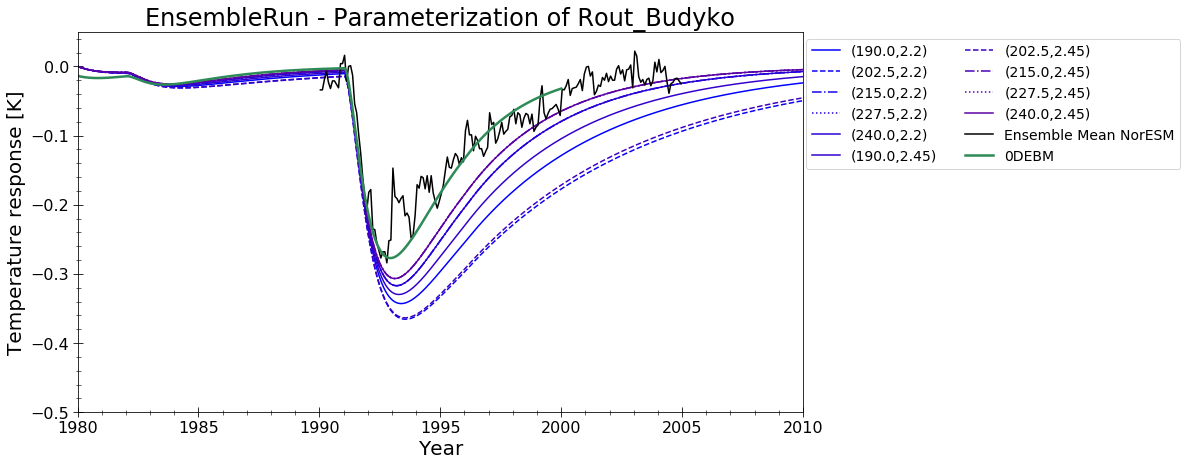

In [105]:
plt.figure(figsize=(13,7))
style=['-','--','-.',':','-']
for i in range(10):
    plt.plot(BudPinatubo[0]/time_sec_year,BudPinatubo[2][:,i]-BudPinCTRL_GMT[i],linestyle=style[i%5],linewidth=1.5,c=(i/25,0,1-i/25)\
            ,label='('+str(configBudPinatubo['funccomp']['funcparam']['func1']['a'][i])+','+str(configBudPinatubo['funccomp']['funcparam']['func1']['b'][i])+')')
plt.plot(Year_NorESM,SAT_VOLC-SAT_TREN,linewidth=1.5,c='k',label='Ensemble Mean NorESM')
plt.plot(Year_volc,EVA_GMT,c='seagreen',label='0DEBM',linewidth=2.5)
plt.title('EnsembleRun - Parameterization of Rout_Budyko')
plt.legend(bbox_to_anchor=(1.03, 0., 0.5, 1),ncol=2,fontsize=14)
plt.xlabel('Year'),plt.ylabel('Temperature response [K]')
plt.xlim(1980,2010),plt.ylim(-0.5,0.05)
#plt.savefig('ResponseDifference_Rout_Budyko.eps',format='eps',dpi=400,bbox_inches='tight')